In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [132]:
# chosen the column names from the car names file
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'] 

In [133]:
data = pd.read_csv("car.csv",names=columns)
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [134]:
#calculating the Nan values
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

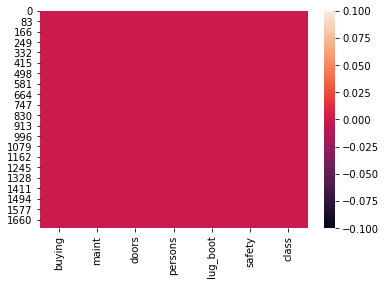

In [135]:
# Visualize how much data missing in columns . As there is no missing value, plot doesn't show anything
import seaborn as sns

sns.heatmap(data.isnull())

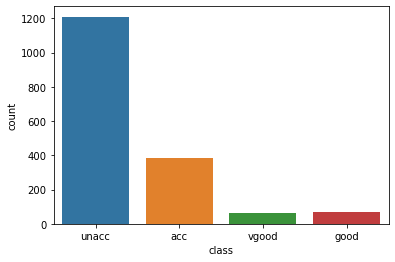

In [136]:
sns.countplot(x='class',data=data)

In [137]:
# number of counts of each possible value in "class"
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [138]:
#Assigning numerical values and assigning to the variable as sklearn doesn't recognize string
def label(data, feature):
    feature_label_name = {ni: n for n, ni in enumerate(set(data[feature]))}
    return feature_label_name
buying_label = label(data, 'buying')
maint_label = label(data, 'maint')
doors_label = label(data, 'doors')
person_label = label(data, 'persons')
lug_boot_label = label(data, 'lug_boot')
safety_label = label(data, 'safety')
class_label = label(data, 'class')

In [139]:
df = data
df['buying'] = df['buying'].map(buying_label)
df['maint'] = df['maint'].map(maint_label)
df['doors'] = df['doors'].map(doors_label)
df['persons'] = df['persons'].map(person_label)
df['lug_boot'] = df['lug_boot'].map(lug_boot_label)
df['safety'] = df['safety'].map(safety_label)
df['class'] = df['class'].map(class_label)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,1,1,0,1,2
1,0,0,1,1,0,2,2
2,0,0,1,1,0,0,2
3,0,0,1,1,2,1,2
4,0,0,1,1,2,2,2
...,...,...,...,...,...,...,...
1723,2,2,3,0,2,2,1
1724,2,2,3,0,2,0,3
1725,2,2,3,0,1,1,2
1726,2,2,3,0,1,2,1


In [140]:
print("buying_label",buying_label)
print("maint_label",maint_label)
print("doors_label",doors_label)
print("persons_label",person_label)
print("lug_boot_label",lug_boot_label)
print("safety_label",safety_label)
print("class_label",class_label)

buying_label {'vhigh': 0, 'high': 1, 'low': 2, 'med': 3}
maint_label {'vhigh': 0, 'high': 1, 'low': 2, 'med': 3}
doors_label {'4': 0, '2': 1, '3': 2, '5more': 3}
persons_label {'more': 0, '2': 1, '4': 2}
lug_boot_label {'small': 0, 'big': 1, 'med': 2}
safety_label {'high': 0, 'low': 1, 'med': 2}
class_label {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}


In [141]:
# Values in the column 'class'
df['class'].value_counts()

2    1210
0     384
1      69
3      65
Name: class, dtype: int64

In [142]:
# X and y values from the dataset
X = df.iloc[:,:5].values
y = df.iloc[:,6:].values

In [143]:
# Chooseing train and test values for the 10 fold dataset.stratified k-fold cross-validation, the folds are selected so that the mean response value is approximately equal in all the folds
# Random state- 42, to get the same output
#Test train split data with 10 folds
kf_data = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
cnt = 1
for train_index, test_index in kf_data.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
  #  print(kf_data)
Xtrain, Xtest = X[train_index], X[test_index]
ytrain, ytest = y[train_index], y[test_index]
    

Fold:1, Train set: 1555, Test set:173
Fold:2, Train set: 1555, Test set:173
Fold:3, Train set: 1555, Test set:173
Fold:4, Train set: 1555, Test set:173
Fold:5, Train set: 1555, Test set:173
Fold:6, Train set: 1555, Test set:173
Fold:7, Train set: 1555, Test set:173
Fold:8, Train set: 1555, Test set:173
Fold:9, Train set: 1556, Test set:172
Fold:10, Train set: 1556, Test set:172


In [144]:
# Defining function to calculate the accuracy using training and testing data
def classifier(model, Xtrain, Xtest, ytrain, y_test):
    clf = model
    clf.fit(Xtrain, ytrain)
    y_pred = clf.predict(Xtest)
    y_score = clf.fit(Xtrain, ytrain)
    score = accuracy_score(ytest, y_pred)
    return score, model

In [156]:
# Calculating Accuracy with no fold
score , tree_model = classifier(DecisionTreeClassifier(random_state=42),Xtrain, Xtest, ytrain, ytest)
print("Accuracy with no fold:",tree_model,score)

Accuracy with no fold: DecisionTreeClassifier(random_state=42) 0.6162790697674418


In [146]:
#Decision Tree Classifier with 10 folds
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(Xtrain, ytrain)
cv_score = cross_val_score(clf_tree, X, y, cv=kf_data,scoring="accuracy")
cv_score_m = cv_score.mean()
for i in range(10):
    print(f'Decision Tree: Accuracy for each fold : {cv_score[i]}')

print(f'\nDecision Tree:AVERAGE ACCURACY: {"{:.4f}".format(cv_score.mean())}')


Decision Tree: Accuracy for each fold : 0.630057803468208
Decision Tree: Accuracy for each fold : 0.6242774566473989
Decision Tree: Accuracy for each fold : 0.6705202312138728
Decision Tree: Accuracy for each fold : 0.6069364161849711
Decision Tree: Accuracy for each fold : 0.5606936416184971
Decision Tree: Accuracy for each fold : 0.6358381502890174
Decision Tree: Accuracy for each fold : 0.6184971098265896
Decision Tree: Accuracy for each fold : 0.6011560693641619
Decision Tree: Accuracy for each fold : 0.5988372093023255
Decision Tree: Accuracy for each fold : 0.6162790697674418

Decision Tree:AVERAGE ACCURACY: 0.6163


In [147]:
#Performing GridSearch to improve the performance.I choose grid search as we define the combinations and 
#do training of the model

In [148]:
DecisionTreeClassifier(class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=1)

DecisionTreeClassifier(random_state=1)

In [149]:
#creates a tuple of hyperparameters we want the machine to test with as save them as param_dist
param_dist={"criterion": ["gini","entropy"],
            "max_depth":[1, 3, 5, 7, 9, 11, 13, 15, 17, 19,None]
                         }
grid = GridSearchCV(clf_tree,param_grid = param_dist,cv=10,n_jobs=-1)

In [150]:
#fit the grid search cv model with training data
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                       None]})

In [151]:
# Finding best estimator
grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=42)

In [152]:
# Finding best accuracy score
grid.best_score_

0.6998759305210918

In [153]:
# Finding best paramters
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [157]:
#Going back to the model and substitute the best values and find the accuracy score. We can see the score has increased
DecisionTreeClassifier(class_weight=None,
                       criterion='gini', max_depth=1, max_features=None,
                       max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=1)

tree_clf = tree.DecisionTreeClassifier(max_depth = 1)
tree_clf.fit(Xtrain,ytrain)
y_pred = tree_clf.predict(Xtest)
print("Accuracy : ",score)
print("Accuracy after GridSearchCV : ",accuracy_score(ytest, y_pred))


Accuracy :  0.6162790697674418
Accuracy after GridSearchCV :  0.7034883720930233


In [155]:
from sklearn.tree import export_graphviz
export_graphviz( 
 grid.best_estimator_,
 out_file=('car_tree.dot'),
 feature_names=None,
 class_names=None,
 filled=True,
)